<a href="https://colab.research.google.com/github/Fluza/Numpy/blob/main/%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82_%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D1%85_%D1%81%D0%B2%D0%BE%D0%B9%D1%81%D1%82%D0%B2_%D0%B2%D1%8B%D0%B1%D0%BE%D1%80%D0%BA%D0%B8_%D0%B8%D1%80%D0%B8%D1%81%D1%8B_%D1%84%D0%B8%D1%88%D0%B5%D1%80%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ПРОЕКТ: использование средств Python для расчёта и визуализации статистических свойств выборки


Выборка- задача многоклассовой классификации ирисов Фишера

 Использование SVD

 


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from numpy.linalg import norm
from numpy.linalg import svd
from ipywidgets import interact

In [ ]:
iris = datasets.load_iris()
dataset = iris['data']
target = iris['target']

In [ ]:
x = pd.DataFrame(dataset, columns=iris.feature_names)
y = pd.DataFrame(target, columns=['species'])
df_iris = pd.concat([x, y], axis=1)
df_iris.name = 'iris dataset'

In [ ]:
print(df_iris.shape)
print(df_iris.info())
df_iris.head()

(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


1.Посчитать основные характеристики выборки по каждому признаку

*среднее

*дисперсия

*минимум

*максимум

*размах



In [ ]:
# список колонок
columns = df_iris.columns

In [ ]:
def df_lvl_describe(data):
    df_lvl_mean = data.mean()
    df_lvl_s2 = sum([(df_lvl_elem - df_lvl_mean) ** 2 for df_lvl_elem in data]) / (len(data) - 1)
    df_lvl_s = (sum([(df_lvl_elem - df_lvl_mean) ** 2 for df_lvl_elem in data]) / (len(data) - 1)) ** 0.5
    df_lvl_min = data.min()
    df_lvl_max = data.max()
    df_lvl_range = df_lvl_max - df_lvl_min


    print(f'mean (выборочное среднее): {df_lvl_mean:.3f}')
    print(f'variance (выборочная дисперсия) : {df_lvl_s2:.3f}')
    print(f'std (среднеквадратичное отклонение) : {df_lvl_s:.3f}')
    print(f'min (наименьшее значение) : {df_lvl_min}')
    print(f'max (наибольшее значение) : {df_lvl_max}')
    print(f'range (размах): {df_lvl_range:.3f}') 

def df_describe(dataset, columns):
    for col in columns:
        print('*****  ' + dataset.name + ' ' + col + '  ******')
        df_lvl_describe(dataset[col])
        print('\n')



In [ ]:
df_describe(df_iris, columns[0:4])
df_iris.iloc[:, 0:4].describe()

*****  iris dataset sepal length (cm)  ******
mean (выборочное среднее): 5.843
variance (выборочная дисперсия) : 0.686
std (среднеквадратичное отклонение) : 0.828
min (наименьшее значение) : 4.3
max (наибольшее значение) : 7.9
range (размах): 3.600


*****  iris dataset sepal width (cm)  ******
mean (выборочное среднее): 3.057
variance (выборочная дисперсия) : 0.190
std (среднеквадратичное отклонение) : 0.436
min (наименьшее значение) : 2.0
max (наибольшее значение) : 4.4
range (размах): 2.400


*****  iris dataset petal length (cm)  ******
mean (выборочное среднее): 3.758
variance (выборочная дисперсия) : 3.116
std (среднеквадратичное отклонение) : 1.765
min (наименьшее значение) : 1.0
max (наибольшее значение) : 6.9
range (размах): 5.900


*****  iris dataset petal width (cm)  ******
mean (выборочное среднее): 1.199
variance (выборочная дисперсия) : 0.581
std (среднеквадратичное отклонение) : 0.762
min (наименьшее значение) : 0.1
max (наибольшее значение) : 2.5
range (размах): 2.400


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


2.Визуализировать распределения признаков посредством seaborn 


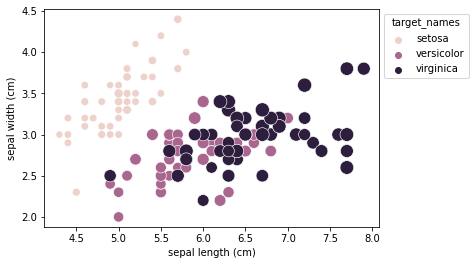

In [ ]:
features = iris.data.T

ax = sns.scatterplot(data=iris, x=features[0], y=features[1], size=features[3], sizes=(50, 200), hue=df_iris['species'])
legend_labels, _ =ax.get_legend_handles_labels()
ax.legend(legend_labels,
          ['setosa', 'versicolor', 'virginica'],
          bbox_to_anchor=(1, 1),
          title='target_names')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

3.Посчитать и визуализировать корреляционную матрицу.


In [ ]:
corr = df_iris.iloc[:, 0:4].corr
corr

<bound method DataFrame.corr of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]>

<Figure size 864x504 with 0 Axes>

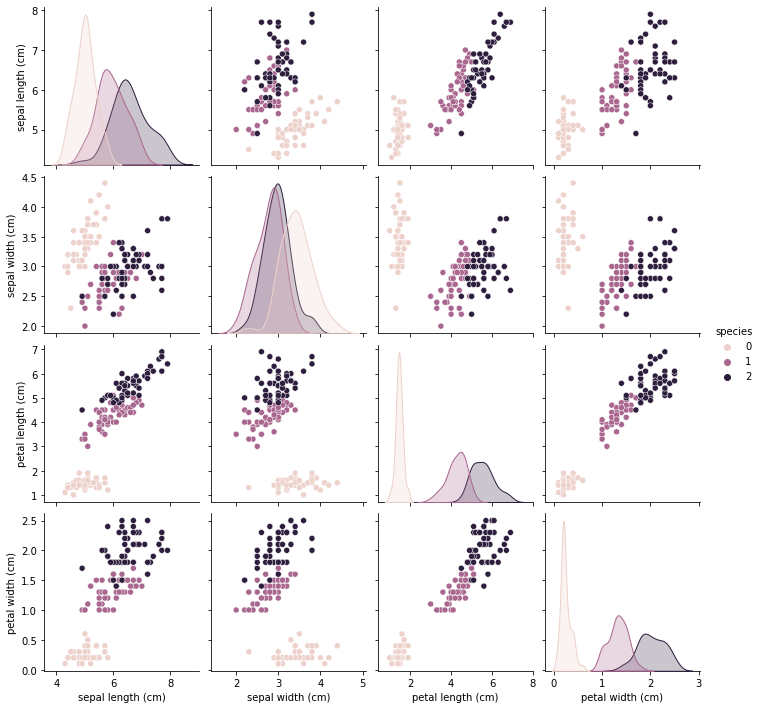

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 7))
fig.suptitle('Классификация признаков')

sns.pairplot(df_iris, hue='species')

plt.show()

3.Посчитать и визуализировать корреляционную матрицу



In [ ]:
corr = df_iris.iloc[:, 0:4].corr()
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


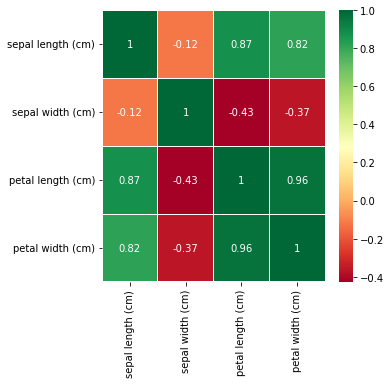

In [ ]:
# Построим матрицу корреляций
sns.heatmap(corr, annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(5, 5)
plt.show()

4.Проверить гепотезу о нормальности распредиления для признаков 1 и 2.


In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
def species_select(dataset, number):
    x_iris = dataset['data']
    y_iris = dataset['target']
    x_g = x_iris[(y_iris == number)]
    y_g = y_iris[(y_iris == number)]
    x_df = pd.DataFrame(x_g, columns=dataset.feature_names)
    y_df = pd.DataFrame(y_g, columns=['species'])
    result = pd.concat([x_df, y_df], axis=1)
    return result

In [ ]:
def get_test(name, data):
    alpha = 0.05
    stat, p = name(data)
    print(f'{name.__name__} statistics=%.3f, p-value=%.3f' % (stat, p))
    if p > alpha:
        print(f'{name.__name__} test: принимается гепотеза о нормальном распределении')
    else:
        print(f'{name.__name__} test: принимается гепотеза о нормальном распределении')

    
def test_report(dataset, columns):
    for col in columns:
        print('*****   ' + dataset.name + ' '+ col + '   ******')
        get_test(stats.shapiro, dataset[col])
        get_test(stats.normaltest, dataset[col])
        print('\n')

In [ ]:
df_setosa = species_select(iris, 0) #Iris-Setosa
df_versicolor = species_select(iris, 1) #Iris-Versicolor 
df_virginica = species_select(iris, 2)  #Iris-Virginica

df_setosa.name = 'Iris_Setosa'
df_versicolor.name = 'Iris_Versicolor'
df_virginica.name = 'Iris_Virginica'

test_report(df_setosa, columns[0:4])
test_report(df_versicolor, columns[0:4])
test_report(df_virginica, columns[0:4])


*****   Iris_Setosa sepal length (cm)   ******
shapiro statistics=0.978, p-value=0.460
shapiro test: принимается гепотеза о нормальном распределении
normaltest statistics=0.194, p-value=0.907
normaltest test: принимается гепотеза о нормальном распределении


*****   Iris_Setosa sepal width (cm)   ******
shapiro statistics=0.972, p-value=0.272
shapiro test: принимается гепотеза о нормальном распределении
normaltest statistics=1.966, p-value=0.374
normaltest test: принимается гепотеза о нормальном распределении


*****   Iris_Setosa petal length (cm)   ******
shapiro statistics=0.955, p-value=0.055
shapiro test: принимается гепотеза о нормальном распределении
normaltest statistics=2.237, p-value=0.327
normaltest test: принимается гепотеза о нормальном распределении


*****   Iris_Setosa petal width (cm)   ******
shapiro statistics=0.800, p-value=0.000
shapiro test: принимается гепотеза о нормальном распределении
normaltest statistics=14.939, p-value=0.001
normaltest test: принимается геп

5.Произвести расчет статистик из пункта 1 для каждого значения таргета


In [ ]:
df_describe(df_setosa, columns[0:4])
df_describe(df_versicolor, columns[0:4])
df_describe(df_virginica, columns[0:4])

*****  Iris_Setosa sepal length (cm)  ******
mean (выборочное среднее): 5.006
variance (выборочная дисперсия) : 0.124
std (среднеквадратичное отклонение) : 0.352
min (наименьшее значение) : 4.3
max (наибольшее значение) : 5.8
range (размах): 1.500


*****  Iris_Setosa sepal width (cm)  ******
mean (выборочное среднее): 3.428
variance (выборочная дисперсия) : 0.144
std (среднеквадратичное отклонение) : 0.379
min (наименьшее значение) : 2.3
max (наибольшее значение) : 4.4
range (размах): 2.100


*****  Iris_Setosa petal length (cm)  ******
mean (выборочное среднее): 1.462
variance (выборочная дисперсия) : 0.030
std (среднеквадратичное отклонение) : 0.174
min (наименьшее значение) : 1.0
max (наибольшее значение) : 1.9
range (размах): 0.900


*****  Iris_Setosa petal width (cm)  ******
mean (выборочное среднее): 0.246
variance (выборочная дисперсия) : 0.011
std (среднеквадратичное отклонение) : 0.105
min (наименьшее значение) : 0.1
max (наибольшее значение) : 0.6
range (размах): 0.500


**

Выводы: принимается гепотеза о нормальном распределении исходных данных, что позволяет в дальнейшем использовать статистический инструментарий для интервального оценивания значения n , проверки гепотез и т.д.




In [ ]:
A = df_iris.iloc[:, :4]
#A
U, s, W = np.linalg.svd(A)
# Транспонируем матрицу W
V = W.T

# s - список диагональных элементов, его нужно привести к виду диагональной матрицы для наглядности
Sigma = np.zeros_like(A, dtype=float)
Sigma[np.diag_indices(min(A.shape))] = s
print(f'Матрица U размер:{U.shape} :\n{U}')
print(f'Матрица Sigma размер:{Sigma.shape} :\n{U}')
print(f'Матрица V размер:{V.shape} :\n{V}') 

Матрица U размер:(150, 150) :
[[-0.06161685  0.12961144  0.0021386  ... -0.09343429 -0.09573864
  -0.08085465]
 [-0.05807094  0.11101978  0.07067239 ...  0.03690405 -0.03153954
   0.01309526]
 [-0.05676305  0.11796647  0.00434255 ...  0.03066199  0.19531473
   0.13569909]
 ...
 [-0.0940593  -0.0498297  -0.04144001 ...  0.98181631 -0.02194514
  -0.00894446]
 [-0.09488961 -0.05610123 -0.21297821 ... -0.02155617  0.94178018
  -0.02971961]
 [-0.08847836 -0.0515697  -0.09575285 ... -0.0086052  -0.03021088
   0.9736599 ]]
Матрица Sigma размер:(150, 4) :
[[-0.06161685  0.12961144  0.0021386  ... -0.09343429 -0.09573864
  -0.08085465]
 [-0.05807094  0.11101978  0.07067239 ...  0.03690405 -0.03153954
   0.01309526]
 [-0.05676305  0.11796647  0.00434255 ...  0.03066199  0.19531473
   0.13569909]
 ...
 [-0.0940593  -0.0498297  -0.04144001 ...  0.98181631 -0.02194514
  -0.00894446]
 [-0.09488961 -0.05610123 -0.21297821 ... -0.02155617  0.94178018
  -0.02971961]
 [-0.08847836 -0.0515697  -0.0957528

In [ ]:
n_elements = 3
Sigma = Sigma[:, :n_elements]

V = V[:, :n_elements]
# reconstruct
B = U.dot(Sigma.dot(V.T))
print (B)

U, s, W = np.linalg.svd(B)
# Транспонируем матрицу W
V = W.T

Sigma = np.zeros_like(A, dtype=float)
Sigma[np.diag_indices(min(A.shape))] = s
print(f'Матрица Sigma размер:{Sigma.shape} :\n{Sigma}')

[[5.09900942 3.50097959 1.4014844  0.19767844]
 [4.86870364 3.03094925 1.44689807 0.12665275]
 [4.69422107 3.20571484 1.30865982 0.18645629]
 [4.62518119 3.0750981  1.4622656  0.25901553]
 [5.01947963 3.58073643 1.37080948 0.24565314]
 [5.40687172 3.89320449 1.68970262 0.41610481]
 [4.61617117 3.38400818 1.37576725 0.33789933]
 [5.01454656 3.38561478 1.47820176 0.23409183]
 [4.40998651 2.89012425 1.38503506 0.22340474]
 [4.91842577 3.08177859 1.4723887  0.14318329]
 [5.40391192 3.69613146 1.49413792 0.20916813]
 [4.8505539  3.3500068  1.5242442  0.31847992]
 [4.80311694 2.99691763 1.39532922 0.10730496]
 [4.30830887 2.99178329 1.08754903 0.11947296]
 [5.74700833 4.05240393 1.27940883 0.07580684]
 [5.69603935 4.40391672 1.5059351  0.39071768]
 [5.34517978 3.95421221 1.38214894 0.27152138]
 [5.07488831 3.52483318 1.43763026 0.24114734]
 [5.68993828 3.80995013 1.71507765 0.27641899]
 [5.12084537 3.77938583 1.46876289 0.34885395]
 [5.40422382 3.39582303 1.69367054 0.20989909]
 [5.08654623 

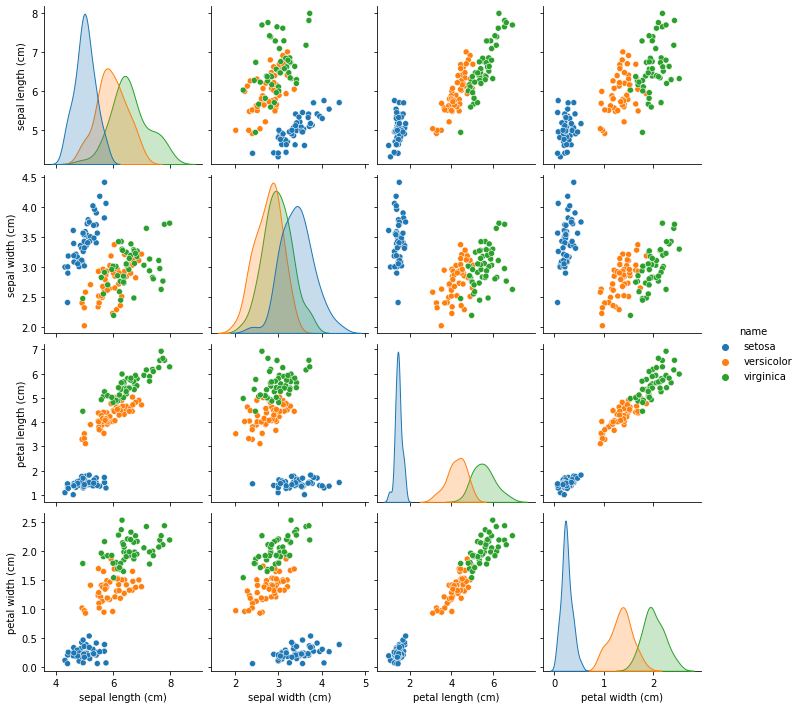

In [ ]:
from pandas.core.groupby.ops import DataFrame
# Для удобства манипулирования данными делаем из них DataFrame:
df_iris = DataFrame(B)
# Делаем имена колонок такие же, как имена переменных:
df_iris.columns = iris.feature_names
# Добавляем столбец с целевой переменной:
df_iris['target'] = iris.target
# Для наглядности добавляем  столбец с сортами:
df_iris['name'] = df_iris.target.apply(lambda x :iris.target_names[x])
# Смотрим, что получилось:

samples,features = df_iris.iloc[:, :5].shape
sns.pairplot(
    df_iris[[
        'sepal length (cm)',
        'sepal width (cm)',
        'petal length (cm)',
        'petal width (cm)',
        'name'
    ]],
    hue = 'name'
)

In [ ]:
B_cov = B.T @ B
print(f'Ковариационная матрица:\n{B_cov}')
U_cov, s_cov, VT_cov = np.linalg.svd(B_cov)
print(f'Собственные значения:\n{s_cov}')
print(f'Собственные векторы:\n{U_cov}')

#Встроенная Функция
B_cov_np = np.cov(B.T)
print(f'Встроенная ковариационная матрица 2:\n{B_cov_np}')
U_cov_np, s_cov_np, VT_cov_np = np.linalg.svd(B_cov_np)
print(f'Собственные значения 2:\n{s_cov_np}')
print(f'Собсвенные векторы 2:\n{U_cov_np}')

Ковариационная матрица:
[[5223.48436313 2673.79158155 3484.30791244 1127.28308048]
 [2673.79158155 1430.04242879 1673.75816452  532.73741533]
 [3484.30791244 1673.75816452 2581.88894483  870.39410701]
 [1127.28308048  532.73741533  870.39410701  300.32169304]]
Собственные значения:
[9.20830507e+03 3.15454317e+02 1.19780429e+01 7.12243463e-13]
Собственные векторы:
[[-0.75110816 -0.2841749   0.50215472  0.32081425]
 [-0.38008617 -0.5467445  -0.67524332 -0.31725607]
 [-0.51300886  0.70866455 -0.05916621 -0.48074507]
 [-0.16790754  0.34367081 -0.53701625  0.75187165]]
Встроенная ковариационная матрица 2:
[[ 0.68237847 -0.03980678  1.27836099  0.50942213]
 [-0.03980678  0.18802515 -0.33268147 -0.11639257]
 [ 1.27836099 -0.33268147  3.11159727  1.30371106]
 [ 0.50942213 -0.11639257  1.30371106  0.56711345]]
Собственные значения 2:
[4.22824133e+00 2.42663908e-01 7.82091126e-02 1.71114510e-16]
Собсвенные векторы 2:
[[-0.36129011 -0.65480314  0.58118889  0.32081425]
 [ 0.08442722 -0.73194942 -0

In [ ]:
C = W.dot(B.T).T
C2 = VT_cov.dot(B.T).T
C3 = VT_cov_np.dot(B.T).T
print(f'Матрица признаков C в новом базисе:\n{C}')
print(f'Матрица признаков C2 в новом базисе:\n{C2}')
print(f'Матрица признаков C3 в новом базисе:\n{C3}')

Матрица признаков C в новом базисе:
[[-5.91274714e+00  2.30203322e+00  7.40153559e-03 -3.78189783e-16]
 [-5.57248242e+00  1.97182599e+00  2.44592251e-01  2.82729515e-16]
 [-5.44697714e+00  2.09520636e+00  1.50292625e-02 -1.40756793e-17]
 [-5.43645948e+00  1.87038151e+00  2.05048805e-02 -2.04771434e-16]
 [-5.87564494e+00  2.32829018e+00 -1.10338269e-01 -3.97516479e-16]
 [-6.47759822e+00  2.32464996e+00 -2.37202487e-01 -4.82566015e-16]
 [-5.51597520e+00  2.07090423e+00 -2.29853120e-01 -1.73034931e-16]
 [-5.85092859e+00  2.14807482e+00  1.87937744e-02 -2.17695659e-17]
 [-5.15891972e+00  1.77506408e+00  6.10392203e-02 -3.70670374e-16]
 [-5.64500117e+00  1.99000106e+00  2.24852923e-01 -5.42202844e-16]
 [-6.26539771e+00  2.42576813e+00  1.70826682e-02 -4.93413370e-16]
 [-5.75200785e+00  2.02037338e+00 -8.75537913e-02 -5.12356118e-16]
 [-5.48058085e+00  1.97777558e+00  2.48078403e-01 -8.59868014e-17]
 [-4.95112411e+00  2.04828749e+00  1.47509030e-02 -3.11245446e-16]
 [-6.52596417e+00  2.91606

ПРАКТИЧЕСКОЕ ЗАДАНИЕ 


НАЙДИТЕ ПОСРЕДСТВОМ NumPy SVD ДЛЯ МАТРИЦЫ



In [ ]:
import numpy as np
np.set_printoptions(precision=2, suppress=True)

In [ ]:
A = np.array([[1, 2, 0],
              [0, 0, 5],
              [3, -4, 2],
              [1, 6, 5],
              [0, 1, 0]])
print(f'Матрица A:\n{A}')

Матрица A:
[[ 1  2  0]
 [ 0  0  5]
 [ 3 -4  2]
 [ 1  6  5]
 [ 0  1  0]]


In [ ]:
U, s, W = np.linalg.svd(A)

# Транспонируем матрицу W
V = W.T

# s - список диагональных элементов, его нужно привести к виду диагональной матрицы
D = np.zeros_like(A, dtype=float)
D[np.diag_indices(min(A.shape))] = s

print(f'Матрица D:\n{D}')

Матрица D:
[[8.82 0.   0.  ]
 [0.   6.14 0.  ]
 [0.   0.   2.53]
 [0.   0.   0.  ]
 [0.   0.   0.  ]]


In [ ]:
print(f'Матрица U:\n{U}')

Матрица U:
[[ 0.17  0.16 -0.53 -0.8  -0.16]
 [ 0.39 -0.53  0.61 -0.43  0.03]
 [-0.14 -0.82 -0.52  0.14  0.07]
 [ 0.89  0.06 -0.25  0.38 -0.06]
 [ 0.08  0.11 -0.08 -0.11  0.98]]


In [ ]:
# Убедимся , что она действительно ортогональна
print(np.dot(U.T, U))

[[ 1.  0. -0.  0. -0.]
 [ 0.  1.  0.  0.  0.]
 [-0.  0.  1. -0. -0.]
 [ 0.  0. -0.  1. -0.]
 [-0.  0. -0. -0.  1.]]


In [ ]:
print(f'Матрица V:\n{V}')

Матрица V:
[[ 0.07 -0.37 -0.93]
 [ 0.72  0.67 -0.21]
 [ 0.69 -0.65  0.31]]


In [ ]:
# Убедимся, что она действительно ортогональна
print(np.dot(V.T, V))

[[ 1.  0. -0.]
 [ 0.  1. -0.]
 [-0. -0.  1.]]


In [ ]:
# Проведем проверку
print(np.dot(U, D), V.T)

[[ 1.51  0.96 -1.34]
 [ 3.47 -3.25  1.55]
 [-1.27 -5.06 -1.33]
 [ 7.84  0.37 -0.62]
 [ 0.72  0.67 -0.21]] [[ 0.07  0.72  0.69]
 [-0.37  0.67 -0.65]
 [-0.93 -0.21  0.31]]
